In [339]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score

ac50 = pd.read_csv('https://www.dropbox.com/s/gavddfyf06bipi8/AC50.csv?dl=0')
drug = pd.read_csv('https://www.dropbox.com/s/stfamkkfdj9mqgn/drugcode.csv?dl=0')


In [301]:
ac50.head(2)

,Unnamed: 0,ACEA_AR_agonist_80hr,ACEA_AR_agonist_AUC_viability,ACEA_AR_antagonist_80hr,ACEA_AR_antagonist_AUC_viability,ACEA_ER_80hr,ACEA_ER_AUC_viability,APR_Cell_count_1_24hr_dn,APR_Cell_count_1_24hr_up,APR_Cell_count_1_72hr_dn,...,Tanguay_ZF_120hpf_OTIC_up,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up
0,C100005,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,NaN,NaN,NaN,...,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0
1,C1000051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
drug.head(3)

,Classification,Code
0,AmbiDILIDrugs,C4291638
1,AmbiDILIDrugs,C64868
2,MostDILI Drugs,C97778


In [303]:
ac50.rename(columns={'Unnamed: 0': 'drugcode'}, inplace=True)
ac50.head(2)


,drugcode,ACEA_AR_agonist_80hr,ACEA_AR_agonist_AUC_viability,ACEA_AR_antagonist_80hr,ACEA_AR_antagonist_AUC_viability,ACEA_ER_80hr,ACEA_ER_AUC_viability,APR_Cell_count_1_24hr_dn,APR_Cell_count_1_24hr_up,APR_Cell_count_1_72hr_dn,...,Tanguay_ZF_120hpf_OTIC_up,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up
0,C100005,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,NaN,NaN,NaN,...,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0
1,C1000051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
drug.rename(columns={'Code': 'drugcode'}, inplace=True)
drug.head(3)

,Classification,drugcode
0,AmbiDILIDrugs,C4291638
1,AmbiDILIDrugs,C64868
2,MostDILI Drugs,C97778


# Data Description/Manipulations

In [305]:
data = pd.merge(ac50, drug,on='drugcode',how='inner')
data.shape

(1636, 1401)

In [306]:
data.head(2)

,drugcode,ACEA_AR_agonist_80hr,ACEA_AR_agonist_AUC_viability,ACEA_AR_antagonist_80hr,ACEA_AR_antagonist_AUC_viability,ACEA_ER_80hr,ACEA_ER_AUC_viability,APR_Cell_count_1_24hr_dn,APR_Cell_count_1_24hr_up,APR_Cell_count_1_72hr_dn,...,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up,Classification
0,C102625707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LessDILIDrugs
1,C103577453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LessDILIDrugs


In [307]:
#remove ambi drugs
# Get names of indexes for which column classification has value "ambi"
indexNames = data[data['Classification'] == "AmbiDILIDrugs" ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

In [308]:
data.shape

(1461, 1401)

In [309]:
# remove duplicates
# sorting by drugcode
data.sort_values("drugcode", inplace = True) 

# dropping ALL duplicte values 
data.drop_duplicates(subset ="drugcode", 
                     keep = False, inplace = True) 

In [310]:
# after remove duplicate drugs 
data.shape

(43, 1401)

In [311]:
cols = data.isnull().sum()
cols

drugcode                             0
ACEA_AR_agonist_80hr                35
ACEA_AR_agonist_AUC_viability       35
ACEA_AR_antagonist_80hr             35
ACEA_AR_antagonist_AUC_viability    35
ACEA_ER_80hr                        31
ACEA_ER_AUC_viability               31
APR_Cell_count_1_24hr_dn            43
APR_Cell_count_1_24hr_up            43
APR_Cell_count_1_72hr_dn            43
APR_Cell_count_1_72hr_up            43
APR_Cell_count_2_24hr_dn            43
APR_Cell_count_2_24hr_up            43
APR_Cell_count_2_72hr_dn            43
APR_Cell_count_2_72hr_up            43
APR_Cell_cycle_arrest_1_24hr_dn     43
APR_Cell_cycle_arrest_1_24hr_up     43
APR_Cell_cycle_arrest_1_72hr_dn     43
APR_Cell_cycle_arrest_1_72hr_up     43
APR_Cell_cycle_arrest_2_24hr_dn     43
APR_Cell_cycle_arrest_2_24hr_up     43
APR_Cell_cycle_arrest_2_72hr_dn     43
APR_Cell_cycle_arrest_2_72hr_up     43
APR_HepG2_CellCycleArrest_1h_dn     43
APR_HepG2_CellCycleArrest_1h_up     43
APR_HepG2_CellCycleArrest

In [312]:


# remove columns have more than 70% NA values
flag = int(len(data) * 0.3)
keep=cols[cols<=flag].index
data1= data[keep]
data1 = data1.fillna(0)
data1.shape

(43, 213)

In [252]:
#from matplotlib import pyplot as plt

#most = data1[data1.Classification.str.contains('Most')]
#others = data1[(data1.Classification.str.contains('Less')) | (data1.Classification.str.contains('No'))]

In [254]:
#labels = ['most','others']
#sizes = [len(most), len(others)]
#plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#plt.show()

In [313]:
inx= data1.Classification=='MostDILI Drugs'
data1.Classification[inx] = 1
data1.Classification[~inx] = 0
data1

C:\Users\SabrinaXie\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SabrinaXie\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,drugcode,TOX21_AP1_BLA_Agonist_ch1,TOX21_AP1_BLA_Agonist_ch2,TOX21_AP1_BLA_Agonist_ratio,TOX21_AP1_BLA_Agonist_viability,TOX21_ARE_BLA_Agonist_ch1,TOX21_ARE_BLA_Agonist_ch2,TOX21_ARE_BLA_agonist_ratio,TOX21_ARE_BLA_agonist_viability,TOX21_AR_BLA_Agonist_ch1,...,TOX21_p53_BLA_p3_viability,TOX21_p53_BLA_p4_ch1,TOX21_p53_BLA_p4_ch2,TOX21_p53_BLA_p4_ratio,TOX21_p53_BLA_p4_viability,TOX21_p53_BLA_p5_ch1,TOX21_p53_BLA_p5_ch2,TOX21_p53_BLA_p5_ratio,TOX21_p53_BLA_p5_viability,Classification
0,C102625707,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,34.319730,22.846998,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0
71,C125337,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0
117,C13010474,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0.004587,0.004560,1000000.000000,0
125,C132605,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1
171,C144701484,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,51.516514,32.014781,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0
172,C148553508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0
173,C148823,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,28.084964,22.298544,1000000.000000,24.360943,22.467788,28.663456,1000000.000000,0
201,C1553602,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1
202,C15686712,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,27.092641,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0
296,C184475352,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,4.224518,23.164092,1000000.0,...,1000000.000000,32.399605,1000000.000000,1000000.000000,37.632385,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1


In [314]:
data1['Classification'].value_counts()

0    31
1    12
Name: Classification, dtype: int64

In [315]:
data2 = data1.drop(['Classification','drugcode'],1)
inx2 = data1==1000000
data2[inx2]= 0
data2[~inx2]= 1
data2

,TOX21_AP1_BLA_Agonist_ch1,TOX21_AP1_BLA_Agonist_ch2,TOX21_AP1_BLA_Agonist_ratio,TOX21_AP1_BLA_Agonist_viability,TOX21_ARE_BLA_Agonist_ch1,TOX21_ARE_BLA_Agonist_ch2,TOX21_ARE_BLA_agonist_ratio,TOX21_ARE_BLA_agonist_viability,TOX21_AR_BLA_Agonist_ch1,TOX21_AR_BLA_Agonist_ch2,...,TOX21_p53_BLA_p3_ratio,TOX21_p53_BLA_p3_viability,TOX21_p53_BLA_p4_ch1,TOX21_p53_BLA_p4_ch2,TOX21_p53_BLA_p4_ratio,TOX21_p53_BLA_p4_viability,TOX21_p53_BLA_p5_ch1,TOX21_p53_BLA_p5_ch2,TOX21_p53_BLA_p5_ratio,TOX21_p53_BLA_p5_viability
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [316]:
data= pd.concat([data1[["Classification",'drugcode']],data2],1)
data.drugcode = preprocessing.LabelEncoder().fit_transform(data.drugcode)
#data_drugcode.head()
data.head(20)


,Classification,drugcode,TOX21_AP1_BLA_Agonist_ch1,TOX21_AP1_BLA_Agonist_ch2,TOX21_AP1_BLA_Agonist_ratio,TOX21_AP1_BLA_Agonist_viability,TOX21_ARE_BLA_Agonist_ch1,TOX21_ARE_BLA_Agonist_ch2,TOX21_ARE_BLA_agonist_ratio,TOX21_ARE_BLA_agonist_viability,...,TOX21_p53_BLA_p3_ratio,TOX21_p53_BLA_p3_viability,TOX21_p53_BLA_p4_ch1,TOX21_p53_BLA_p4_ch2,TOX21_p53_BLA_p4_ratio,TOX21_p53_BLA_p4_viability,TOX21_p53_BLA_p5_ch1,TOX21_p53_BLA_p5_ch2,TOX21_p53_BLA_p5_ratio,TOX21_p53_BLA_p5_viability
0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
125,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,0,4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,0,5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
201,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,1,9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [317]:
# convert data types
for i in range(81):
    data.iloc[:,i]= pd.to_numeric(data.iloc[:,i])

In [318]:
target = data['Classification'].copy()
type(target)
#remove target and drugcode
data.drop(['Classification', 'drugcode'], axis=1, inplace=True)

### Split data into training and testing 

In [319]:
# stratify the imbalance "classification"
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=7,
                                                    stratify=target) 

# Building Machine Learning Models

In [320]:
models = []

models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))

In [321]:
acc_results=[]
auc_results=[]
names=[]
# set table to store results
col = ['Algorithm','ROC AUC Mean','Accuracy Mean']
df_results= pd.DataFrame(columns=col)
i=0

In [322]:
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3,random_state =7) #3 folds cv
    cv_acc_results = model_selection.cross_val_score (
    model,X_train,y_train,cv=kfold,scoring='accuracy')
    cv_auc_results =model_selection.cross_val_score(
     model,X_train,y_train,cv=kfold,scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    
    df_results.loc[i]=[name,
                      round(cv_auc_results.mean()*100,2),
                      round(cv_acc_results.mean()*100, 2)]
    i += 1
    

In [323]:
df_results

,Algorithm,ROC AUC Mean,Accuracy Mean
0,Random Forest,54.51,66.67
1,SVM,48.26,73.33


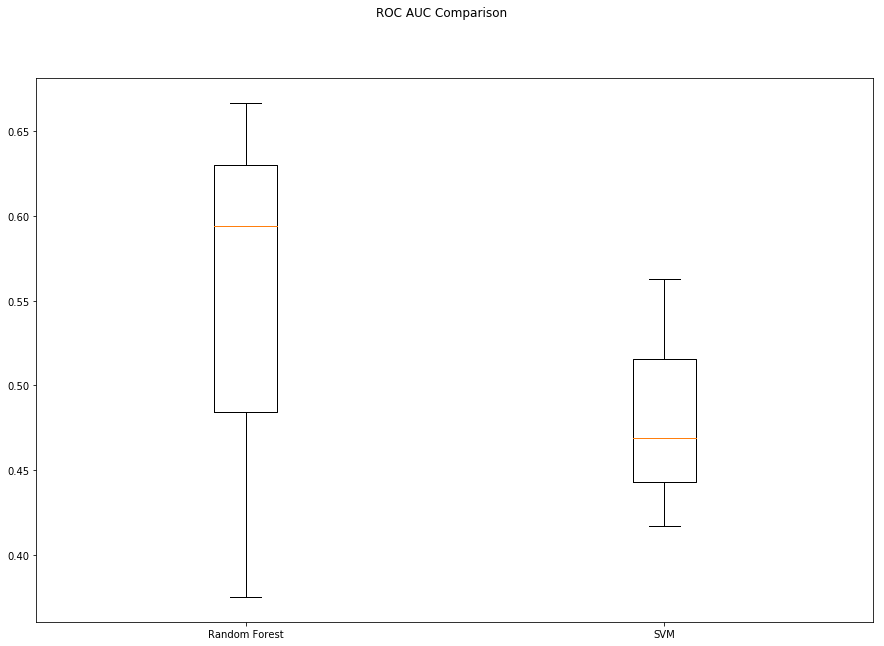

In [324]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('ROC AUC Comparison')
plt.boxplot(auc_results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

### Tuning RF

In [327]:
rf = RandomForestClassifier(class_weight = 'balanced',random_state=7)

#use 'Grid Search'- create a parameter grid based on best values provided by random search
param_grid ={
    'n_estimators':[5,15,50,75,100],
    'min_samples_split':[2,4,6,8,10],
    'min_samples_leaf':[1,2,3,4],
    'max_depth':[5,10,15]
}

# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator =rf,
    iid=True,
    param_grid = param_grid,
    cv=3,
    scoring='roc_auc'
)

In [328]:
# Fit the grid search to the data
grid_fit= grid_search.fit(X_train,y_train)

best_grid= grid_fit.best_estimator_

print("best params: " + str(grid_search.best_params_))

best params: {'min_samples_split': 2, 'n_estimators': 15, 'max_depth': 5, 'min_samples_leaf': 2}


In [350]:
best_grid= grid_fit.best_estimator_
importances = best_grid.feature_importances_

#bars= np.argsort(importances)[::-1]

#plt.suptitle('Feature Importance')
#names=[X_train.columns[i] for i in bars]
#plt.xticks(range(X_train.shape[1]),names,rotation=90)
#plt.bar(range(X_train.shape[1]),importances[bars])

In [347]:
# top 5 of the most important features

top_5 = np.argsort(importances)[::-1][:5]
top_5
data.columns[top_5]

Index([u'TOX21_RT_HEK293_GLO_16hr_viability',
       u'TOX21_RT_HEPG2_FLO_40hr_ctrl_viability',
       u'TOX21_RT_HEK293_FLO_08hr_viability',
       u'TOX21_RT_HEK293_GLO_08hr_viability',
       u'TOX21_ERb_BLA_Antagonist_viability'],
      dtype='object')

### Evaluation 

In [334]:
best_grid.score(X_test, y_test)*100

61.53846153846154

In [337]:
# classification report for the optimised RF regression 
best_grid.fit(X_train,y_train)
print(classification_report(y_test,best_grid.predict(X_test)))

             precision    recall  f1-score   support

          0       0.75      0.67      0.71         9
          1       0.40      0.50      0.44         4

avg / total       0.64      0.62      0.63        13

